# Audiolib

## Introduction

Audiolib is a wrapper around `numpy` and `librosa` aimed at speeding up the analysis of audio data by offering an API to create audio data pipelines.

The audiolib API defines two main classes: `Audio` and `Spectrogram`. These are extended versions of numpy arrays, with the addition of processing and visualisation methods, as well as methods to convert between the two classes.

## Demo:

### Audio

In [1]:
# Load sample
from audiolib import samples

piano_array, sampling_rate = samples.piano()
print(type(piano_array))

<class 'numpy.ndarray'>


<class 'audiolib.audio.Audio'>


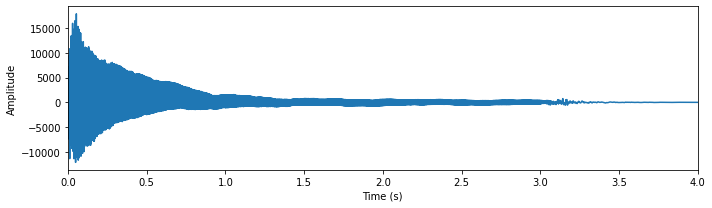

In [2]:
# Convert a numpy array to an Audio object, plot the waveform and play the audio
from audiolib import Audio

piano = Audio(piano_array, sampling_rate)
print(type(piano))
piano.plot()
piano.play()

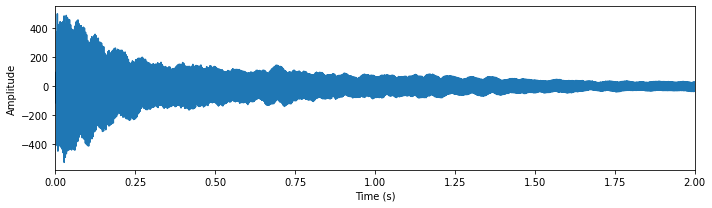

In [3]:
# Audio objects have audio processing methods which can be pipelined
(piano.trim(end=2)
      .filter(lowcut=2000, btype='highpass')
      .plot())

(64000,)


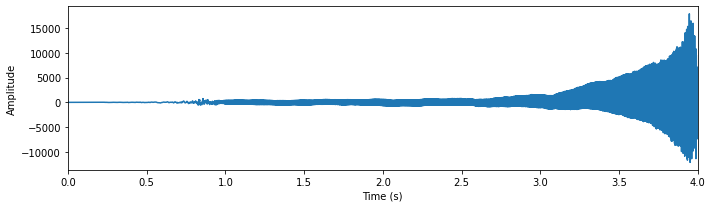

In [4]:
# N.B. Audio objects inherit all numpy array methods and attributes
print(piano.shape)
piano[::-1].plot()

### Spectrograms

<class 'audiolib.spectrogram.Spectrogram'>


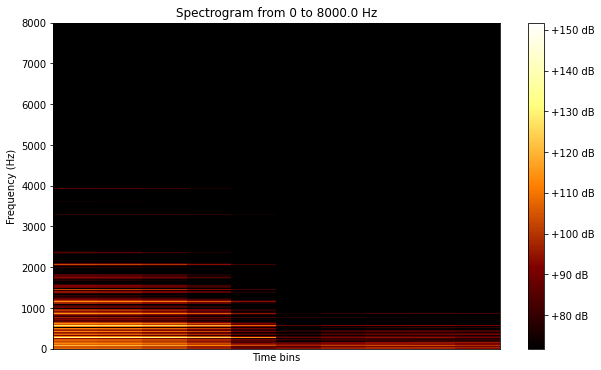

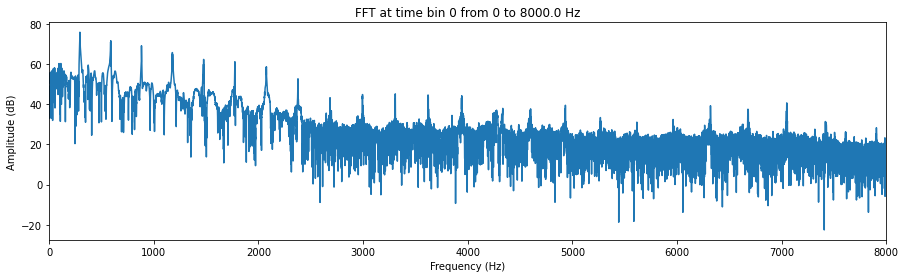

In [16]:
# Audio objects can be transformed to spectrograms, which have their own methods
piano_spec = piano.to_spectrogram(time_intervals=10)
print(type(piano_spec))
piano_spec.plot()
piano_spec.plot_fft()

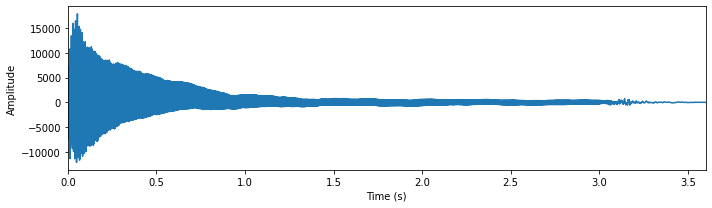

In [83]:
# Spectrograms can be converted back to audio. This is a lossy conversion
# which depends on the time and frequency resolutions used to create the spectrogram
recovered_audio = spec.to_audio()
recovered_audio.plot()
recovered_audio.play()

### Have fun with it!

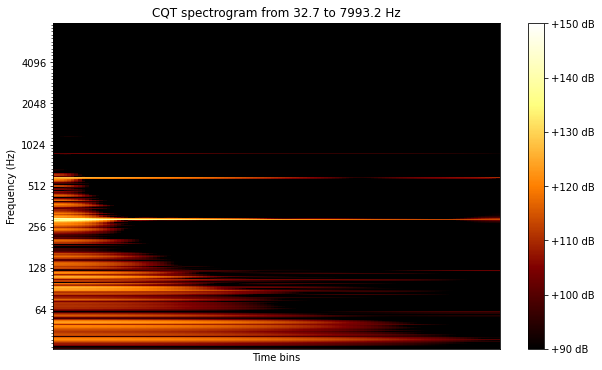

In [82]:
from audiolib import samples, Audio

(Audio(*samples.piano())
 .trim(end=2)
 .filter(highcut=512)
 .to_spectrogram(cqt=True, time_intervals=100, resolution=10)
 .plot(db_thresh=90))